In [16]:
%pylab inline
import circlesquare
import pandas as pd
import scipy.optimize

Populating the interactive namespace from numpy and matplotlib


In [21]:
initial_params = {'num_vulns':1000, 'max_area':.01}
#assume that one day is one round?

In [22]:
data = pd.Series(index=range(0,500), #assume index of data to be (essentially) the rounds of searching
                 data=range(0,500))

In [27]:
def error(paramlist):
    params = dict(zip(initial_params.keys(), paramlist))
    output = run_it(params)
    errors = data - output
    return sum(errors**2)
    
def run_it(params):

    model = circlesquare.CircleSquare()
    model.make_points(params['num_vulns'])

    seeker = model.new_interface('Seeker')
    seeker.make_circles(max_area=params['max_area'])
    
    round_counts = []
    for i in data.index:
        round_counts.append({'round':model.rounds_hardened, 
                             'total':model.count_pts()})
        seeker.harden(1) 
        
    df = pd.DataFrame(index=data.index, data=round_counts)

    return df['total'].iloc[0] - df['total']


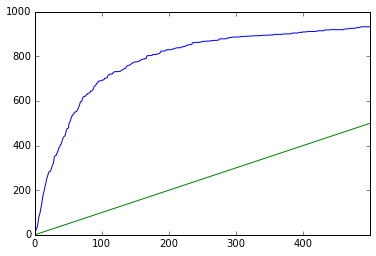

In [31]:
run_it(initial_params).plot()
data.plot()

In [30]:
error(initial_params.values())

136945093

In [32]:
scipy.optimize.minimize(error, initial_params.values())

ValueError: negative dimensions are not allowed